## Домашняя работа №1. (Random walk)

Импортируем Нумпай и Матпотлиб, устанавливаем значение seed для получения идентичных результатов

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(13,7)
np.random.seed(42)

Моделируем вектор шагов и находим кумулятивную сумму

In [21]:
walks = np.random.binomial(1,0.5,1000)
walks[walks==0] = -1
walks[0]=0
track = np.array(walks)
for i in range(2,1000,1):
    track[i]=track[i]+track[i-1]
    
### мой тест

my_list = np.zeros(1000)
my_list[1:20] = 1
my_list[20:50] = -1
my_list[50:100] = -1
my_list[100:300] = -1
my_list[300:500] = 1
my_list[500:1000] = -1

track = np.cumsum(my_list)
walks = my_list

Находим максимум и минимум на пути

In [22]:
track_max = np.max(track)
max_index = np.argmax(track)
track_min = np.min(track)
min_index = np.argmin(track)

Находим первые 10 шагов в одну сторону

In [23]:
path = 0
t_end = 0
t_start = 0
for i in range(1,999,1):
    if walks[i]==walks[i+1]:
        path = path+1
    elif path > 9:
        t_end = i
        t_start = i-path
        break
    else:
        path = 0

if t_end==0:
    print("Такого пути нет")
if t_end!=0:
    print("Начало:"+str(t_start))
    print("Конец:"+str(t_end))

Начало:1
Конец:19


Находим подобным образом максимальный путь в одну сторону

In [24]:
path = 0
max_path = 0
t_max_end = 0
t_max_start = 0
for i in range(1,999,1):
    if walks[i]==walks[i+1]:
        path = path+1
    elif path > max_path:
        max_path = path
        t_max_end = i
        t_max_start = i-path
        path = 0
    else:
        path = 0

print("Начало:"+str(t_max_start))
print("Конец:"+str(t_max_end))
print("Длина пути:"+str(max_path+1))

Начало:20
Конец:299
Длина пути:280


Теперь визуализируем все выше найденное

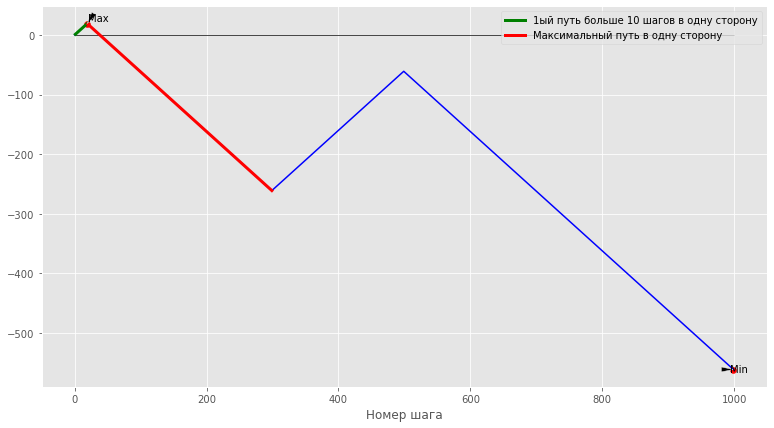

In [25]:
plt.style.use("ggplot")
fig, ax = plt.subplots()

ax.plot(track, color ="blue")
ax.set_xlabel("Номер шага")
ax.hlines(0,1,1000,linewidth=0.7)
ax.annotate("Max",xy=(max_index,track_max),
            xytext=(max_index+1,track_max+5),
            arrowprops=dict(facecolor='black',width=2,headwidth=5, shrink=0.05))

ax.annotate("Min",xy=(min_index,track_min),
            xytext=(min_index-5,track_min-5),
            arrowprops=dict(facecolor='black',width=2,headwidth=5, shrink=0.05))

ax.scatter(max_index,track_max, color="r")
ax.scatter(min_index,track_min, color = "r")

ax.plot(range(t_start,t_end+1,1),track[t_start:t_end+1],
        color="g",linewidth=3,label="1ый путь больше 10 шагов в одну сторону")

ax.plot(range(t_max_start,t_max_end+1,1),track[t_max_start:t_max_end+1],
        color="r",linewidth=3, label="Максимальный путь в одну сторону")

ax.legend()